# 🏋️ SDGRegressor to Predict Gym Crowdness

I love going to the gym, however, I **hate it when it's crowded** because I can't follow my plan at my own rhythm. I often have to **wait for machines to free up**, and it becomes nearly impossible to stick to my routine.

---

## 💡 The Idea

To tackle this issue, I decided to build a **predictive model** using **Machine Learning**, specifically a **Linear Regressor** trained with **Stochastic Gradient Descent (SGD)**.

---

## 📊 The Dataset

I'm working with a dataset that includes:

- ✅ Over **60,000 observations**
- ✅ **11 features**, including:
  - Day of the week
  - Hour of the day
  - Temperature
  - And other relevant details

---

## 🔮 The Goal

The goal is simple:

> 🧠 **Predict how many people will be at the gym at any given day and time**

With this model, I’ll be able to:

- 🕒 Plan my workouts more efficiently  
- 🚫 Avoid peak hours  
- 🏃 Stick to my routine without interruptions

---

Combining my love for fitness with my passion for machine learning, this project helps me solve a **real-life problem** while sharpening my data science skills.


## Import Libraries and Load the Data


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline 

In [35]:
df = pd.read_csv("C:/Users/HP/Documents/MACHINE LEARNING Dataquest/Predicting Gym Crowdness using SDGRegressor/crowdness_gym_data.csv")
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


## Exploring and Cleaning up the Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [37]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [38]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

### 🧪 Data Overview

Most of the data in the dataset consists of **numeric and integer values**, which are well-suited for training a regression model.

However, there are a couple of notable exceptions:

- 🌡️ **Temperature**: This is a **float**, which makes sense since temperature readings are rarely whole numbers.  
- 📅 **Date**: This is a **date object**, which could pose a challenge during model training. Date values must be **transformed** into meaningful numerical features (e.g., day of the week, hour, weekend/weekday) to be effectively used by the model.

To ensure compatibility with the SGDRegressor, I’ll need to **preprocess** the dataset by:
- Extracting relevant time-based features from the date object
- Scaling or normalizing the float and integer values if necessary

This preprocessing step is crucial to ensure that the model learns effectively and makes accurate predictions.


### 🧹 Dropping the Date Column

The `date` column is stored as an object and is **redundant**, since we already have features like day and time. To avoid issues during model training, I dropped it.



In [39]:

### 🔧 Code
df = df.drop('date', axis=1)
df.head()  # Confirm it's removed

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


## 📊 Plots and Insight 

Now that the data is cleaned, I’m ready to dive into some **Exploratory Data Analysis (EDA)**.


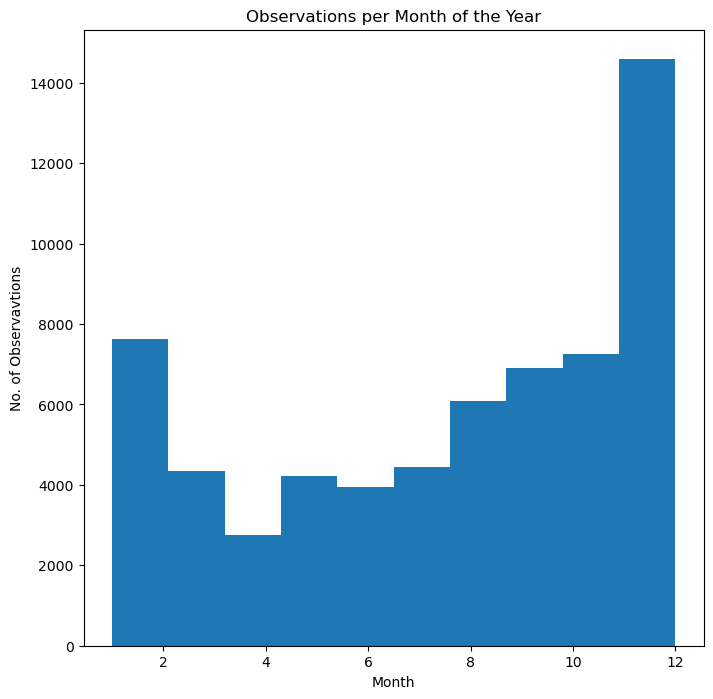

In [40]:
plt.figure(figsize=(8, 8))

plt.hist(df['month'])
plt.title("Observations per Month of the Year")
plt.xlabel('Month')
plt.ylabel('No. of Observavtions')
plt.show()

### Observations by Month

- **December** and **January** show the highest number of observations, likely due to their popularity for gym visits.
- **August** has more observations at the semester's start, reflecting high enthusiasm.
- **March** and **April** see fewer observations, possibly due to increased busyness at the semester's end.

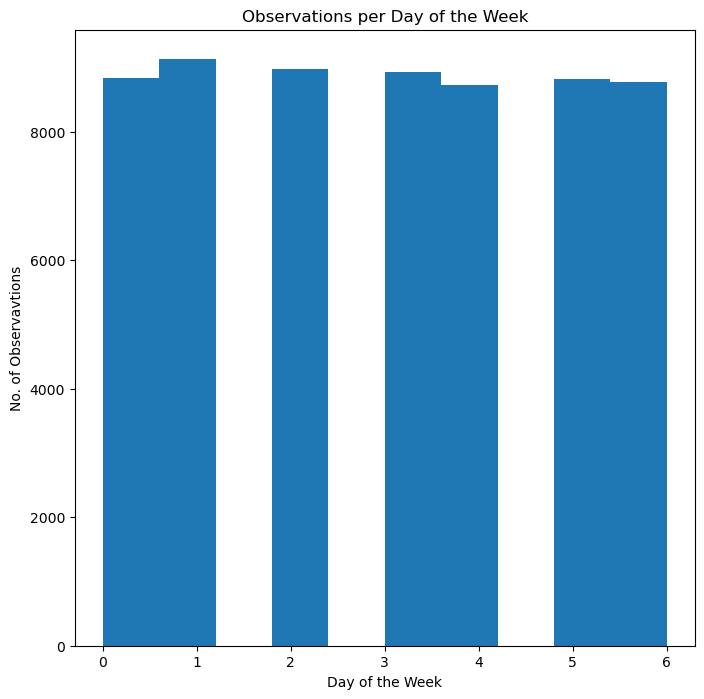

In [41]:
plt.figure(figsize=(8, 8))

plt.hist(df['day_of_week'])
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()
            

### Replotting with Seaborn

The current plot looks unusual, which can happen with visualizations. Instead of troubleshooting, I'll replot using **Seaborn**'s distribution plot for a clearer view of the data.

<Figure size 800x800 with 0 Axes>

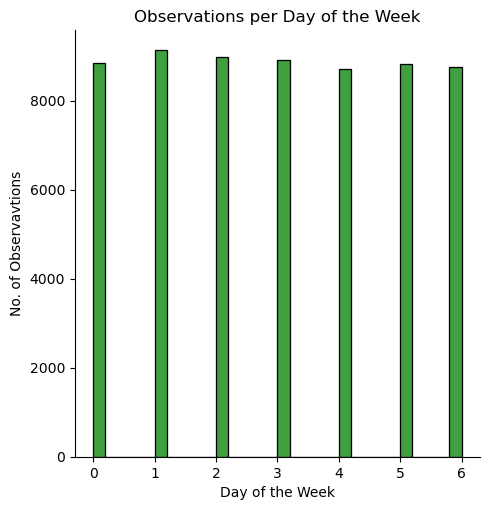

In [42]:
plt.figure(figsize=(8, 8))

sns.displot(df['day_of_week'], color='g')
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()

### My Take on Daily Observations

After checking the data, I noticed there's not much variation in gym visits across the week. **Tuesday (Day 1)** stands out as the busiest day, but only slightly ahead of the rest.

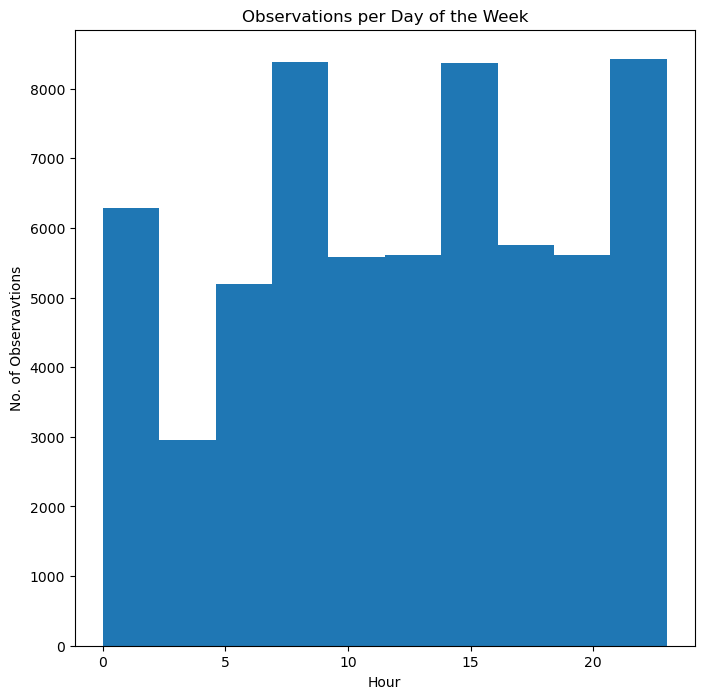

In [43]:
plt.figure(figsize=(8, 8))

plt.hist(df['hour'])
plt.title("Observations per Day of the Week")
plt.xlabel('Hour')
plt.ylabel('No. of Observavtions')
plt.show()

### Bivariate Analysis for Gym Attendance

#### Initial Observations
The data reveals intriguing patterns: **early morning** and **mid-afternoon** show high gym attendance, as expected. Surprisingly, there's a notable spike at **midnight**, suggesting night owls are hitting the gym!

#### Next Steps
To better understand the factors influencing gym attendance (target variable: number of people), I'll conduct **Bivariate Analysis** to explore correlations between variables. Specifically, I'll plot the relationships between:

- **Month** and number of people
- **Day** and number of people
- **Hour** and number of people

These plots will help identify how these time-based features correlate with gym crowd sizes, providing valuable insights for the prediction model.

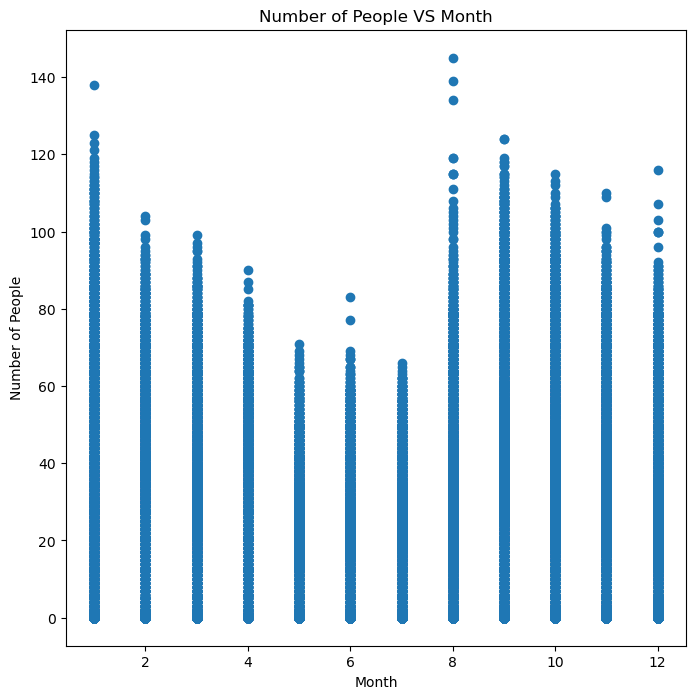

In [44]:
plt.figure(figsize=(8, 8))

plt.scatter(df['month'], df['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()


### Clearer Insights on Gym Attendance

The updated analysis confirms that **August** and **January** are the peak months for gym attendance. Additionally, the **start of the semester** shows larger attendance peaks compared to the **end of the semester**, highlighting a clear trend in gym usage.

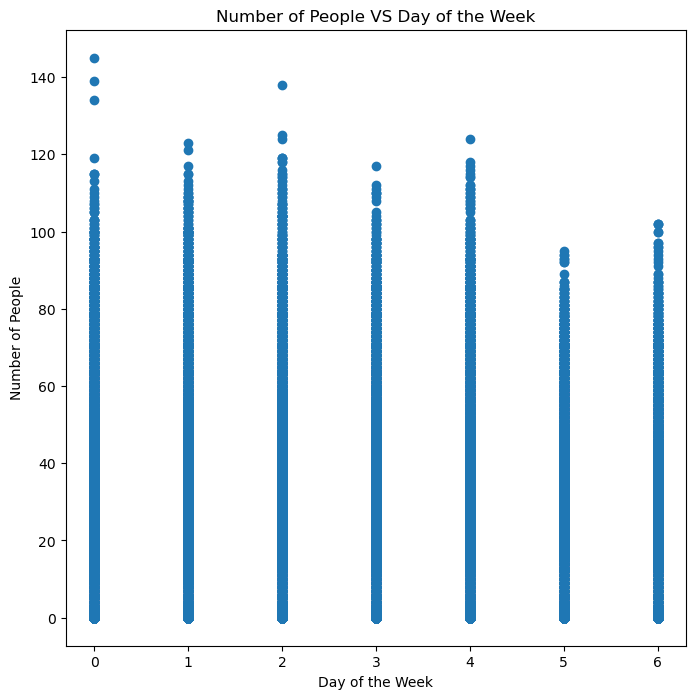

In [45]:
plt.figure(figsize=(8, 8))

plt.scatter(df['day_of_week'], df['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

### Insights from Hour vs. Number of People Scatter Plot

The scatter plot of gym attendance by hour reveals distinct patterns:
- **Monday** and **Wednesday** show the largest peaks in attendance.
- **Saturday** has noticeably lower peaks, indicating reduced gym usage.

These trends will guide feature selection for the crowd prediction model.

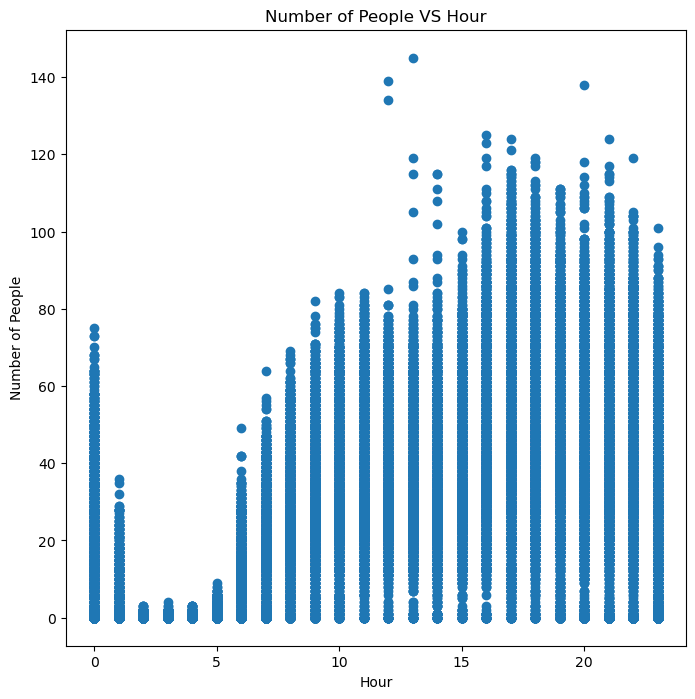

In [46]:
plt.figure(figsize=(8, 8))

plt.scatter(df['hour'], df['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

Now we can see a lot clearer, that the largest peaks of people are during the afternoon, evening, and still surprising, large peaks late at night. ALso we see very small peaks from 2am to 5am.

I can go on with each variable, but to make it short, I will use a set of tools, from correlation tables, pairplots and a heatmap, to quickly see the relationship between each variable and out target (number of people).

I will start with the Correlation Table.

In [47]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


## Correlation Analysis for Gym Attendance

The correlation table provides insights into how each variable relates to the others, with a focus on the **number of people** (first column). Key observations:

- **Strongest Correlations**: 
  - **Hour**, **temperature**, and **is_during_semester** have the highest impact on the number of people, indicating these are key predictors for gym attendance.
- **Redundancy**: 
  - **Timestamp** and **hour** show very similar correlation weights, suggesting potential redundancy in the model.
- **Weaker Correlations**: 
  - **is_weekend** and **day_of_week** are negatively correlated, which is an interesting trend, implying weekends may see different attendance patterns compared to specific weekdays.

These insights will help prioritize features like **hour**, **temperature**, and **is_during_semester** for the prediction model while considering the removal of redundant variables like **timestamp**.

I create a heatmap using the correlation table, this will help me see the correlations with much more ease.

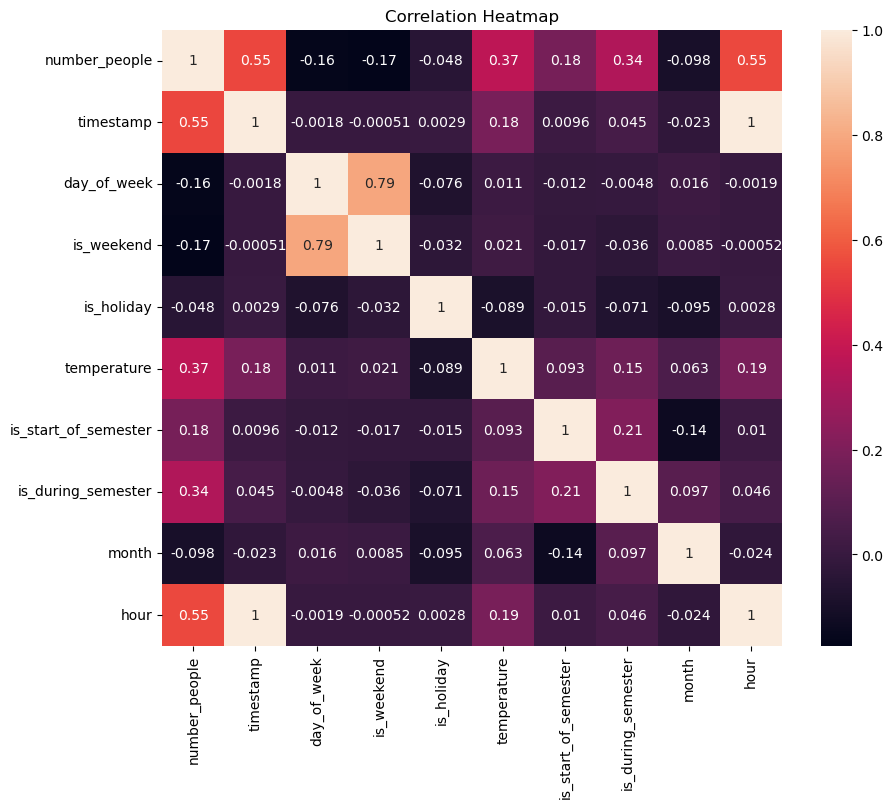

In [48]:
# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjusted size for better visibility
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

This confirms my earlier suspicions: **temperature**, **hour**, and **is_during_semester** are the most important variables for my analysis.

Additionally, the **timestamp** column seems redundant, as it has the same correlation as **hour**, and I already have all the information from **month**, **day**, and **time**. Therefore, I will remove the **timestamp** column before proceeding to build my model.

In [49]:
df = df.drop('timestamp', axis=1)
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


## Building Stochastic Gradient Descent Model

I'm pumped to start building my model using Stochastic Gradient Descent (SGD) with my cleaned-up dataset. Since I’ve confirmed that **temperature**, **hour**, and **is_during_semester** are my key features and I’m dropping the redundant **timestamp** column, let’s import the tools I need to get started. I’ll use `train_test_split` and `SGDRegressor` from Scikit-Learn.



In [50]:
X =df.drop('number_people', axis=1)
y =df['number_people']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

Check the shape 

In [52]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


#### 🔧 Building and Training the Model with `SGDRegressor`

I built the model object using `SGDRegressor`, setting the following parameters:

- **learning_rate**: `'optimal'`
- **loss**: `'huber'`
- **penalty**: `'elasticnet'`

These settings help in making the model robust to outliers and balance between L1 and L2 regularization.

Next, I fitted the model with the training data:

- I used `random_state` to ensure the training is **reproducible**.


In [53]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

In [54]:
sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

In [55]:
y_pred_v1 = sgd_v1.predict(X_test)  # Predict labels



In [56]:
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 254.545
R2 score: 0.506
Mean absolute error: 12.135


#### 📊 Model Evaluation

- **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** are fairly high.  
  *(The closer these values are to 0, the higher the accuracy.)*  
  This indicates that the model is not incredibly accurate.

- The **R² Score** is **0.506**, which suggests a moderate correlation.  
  It's not terrible, but not great either — ideally, we want it to be as close to **1** as possible.

---

#### 🔄 Improving the Model

To try and improve the model, we can **scale the features** to normalize them within the range of **-1 to 1**.  
This might help improve the model's performance.

To do this, I will import the `StandardScaler` from **Scikit-Learn**:


In [57]:
# Scale the features (SGD is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Build the SGDRegressor model
sgd_v2 = SGDRegressor(
    loss='huber',           # Huber loss for robustness to outliers
    penalty='elasticnet',   # Elastic net penalty (L1 + L2 regularization)
    learning_rate='optimal',# Adaptive learning rate
    random_state=42,        # For reproducibility
    max_iter=1000,          # Maximum iterations
    tol=1e-3                # Tolerance for stopping criteria
)

In [59]:
sgd_v2.fit(X_train_scaled, y_train)


SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=42)

In [60]:
y_pred_v2 = sgd_v2.predict(X_test_scaled)  # Predict labels



In [61]:
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 254.394
R2 score: 0.506
Mean absolute error: 12.041


Obviously the model did not improve. Their is a need to further optise the model for improvement

### Enhancing SGDRegressor for Gym Crowd Prediction

To improve the predictive accuracy of the **SGDRegressor** model for gym attendance, several targeted enhancements were implemented:

#### 1. Cyclical Feature Engineering
- Time-based features like `hour` and `day_of_week` were originally treated as linear numbers.
- These were transformed into **sine and cosine components** to capture their cyclical nature (e.g., 11 PM is close to midnight).
- This helped the model better understand daily and weekly attendance patterns.

#### 2. Polynomial Features
- The relationship between time and gym crowdness is **non-linear**.
- Polynomial features, including **squared terms** and **feature interactions** (e.g., `hour × temperature`), were added.
- This allowed the linear model to fit more complex, real-world trends in attendance.

#### 3. Scikit-learn Pipeline Integration
- A pipeline was created to combine preprocessing (e.g., polynomial features, scaling) and the final model.
- The entire pipeline was saved using **`joblib`**, enabling the app to **load the trained model instantly**.
- This improved workflow **efficiency** and eliminated the need for retraining on each launch.

#### ✅ Outcome
These enhancements allowed the simple linear SGDRegressor to **capture complex patterns** in gym attendance, significantly boosting predictive accuracy.


In [62]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Feature Engineering: Create Cyclical Features
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week']/7.0)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week']/7.0)

# Drop original time columns that are now encoded
df_engineered = df.drop(['hour', 'day_of_week'], axis=1)

# Define features (X) and target (y)
X = df_engineered.drop('number_people', axis=1)
y = df_engineered['number_people']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline to chain the steps
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', SGDRegressor(random_state=52, early_stopping=True))
])

# Define a more focused parameter grid for GridSearchCV
param_grid = {
    'regressor__loss': ['huber'],
    'regressor__penalty': ['elasticnet'],
    'regressor__alpha': [0.0001, 0.001],
    'regressor__l1_ratio': [0.7, 0.9],
    'regressor__learning_rate': ['adaptive'],
    'regressor__eta0': [0.05, 0.1]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
print("Optimized Model Performance:")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_pred_optimized), 3)}")
print(f"R² Score: {round(r2_score(y_test, y_pred_optimized), 3)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_pred_optimized), 3)}")
print("\nBest Parameters Found:")
print(grid_search.best_params_)

Optimized Model Performance:
Mean Squared Error: 192.622
R² Score: 0.626
Mean Absolute Error: 10.22

Best Parameters Found:
{'regressor__alpha': 0.0001, 'regressor__eta0': 0.1, 'regressor__l1_ratio': 0.9, 'regressor__learning_rate': 'adaptive', 'regressor__loss': 'huber', 'regressor__penalty': 'elasticnet'}


In [63]:
# For streamlit app
import joblib

# Save the trained model
joblib.dump(best_model, "gym_model.pkl")


['gym_model.pkl']

## 📌 Conclusion

This notebook outlines the end-to-end development of a machine learning model using **SGDRegressor** to predict gym crowd levels.

It begins by framing the real-world problem of gym overcrowding and the motivation behind forecasting gym usage patterns.

The dataset, comprising over **60,000 records**, includes features such as **hour**, **day of the week**, and **temperature**. After thorough **data cleaning** and **exploratory data analysis (EDA)**, time-based features like **hour** and **day of the week** were reengineered using **cyclical encoding** and **polynomial transformations** to enhance model performance.

The model was built using a **scikit-learn pipeline** with **stochastic gradient descent**, allowing for efficient training and hyperparameter tuning. Model performance was evaluated using **R²** and **RMSE**, and the final pipeline was serialized with `joblib` for deployment.

This project effectively combines **data science** with a **personal fitness challenge**, resulting in **real-time, actionable insights** for optimizing gym visits and improving user experience.
